# Project 2-2

Jianying Zhu

May 10, 2021

## 2. Diabetes Data & Analytics

### Problems Statement:

2. **Diabetes Data Set** - Classification: 
   What important factors caused patients diabetes?


In [1]:
import numpy as np
import pandas as pd
import os
import random

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from prettytable import PrettyTable
from tabulate import tabulate

from time import perf_counter

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA

from dmba import classificationSummary, gainsChart
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [2]:
for dirname, _, filenames in os.walk('C:\\Users\\14830\\Downloads\\diabetes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\14830\Downloads\diabetes\diabetes.csv


In [3]:
diabetes = pd.read_csv('.\\diabetes\\diabetes.csv')
display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#feature types
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Preparation

In [6]:
dataframe = [('Pregnancies','Integer', 'Number of times pregnant'), 
             ('Glucose','Integer', 'Plasma glucose concentration at 2 hours \
              in an oral glucose tolerance test'),
             ('Blood Pressure', 'Integer', 'Diastolic Blood Pressure (mm Hg)'),
             ('Skin Thickness', 'Integer', 'Triceps skin fold thickness(mm)'),
             ('Insulin', 'Integer', '2-hour serum insulin((µU/ml)'),
             ('BMI', 'Numeric', 'Body Mass Index(kg/m2)'),
             ('Diabetes Pedigree Function', 'Numeric',  'History of diabetes in relatives or generic'),
             ('Age', 'Integer', 'Age(years)'),
             ('Outcome','Integer', 'Occurrence of Diabetes (0 or 1)')]

table = pd.DataFrame(dataframe, columns=['Variable Name', 'Variable Type', 'Variable Description'])
table.index += 1
#display the full text of rows
pd.set_option("display.max_colwidth", None)
display(table)

,Variable Name,Variable Type,Variable Description
1,Pregnancies,Integer,Number of times pregnant
2,Glucose,Integer,Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3,Blood Pressure,Integer,Diastolic Blood Pressure (mm Hg)
4,Skin Thickness,Integer,Triceps skin fold thickness(mm)
5,Insulin,Integer,2-hour serum insulin((µU/ml)
6,BMI,Numeric,Body Mass Index(kg/m2)
7,Diabetes Pedigree Function,Numeric,History of diabetes in relatives or generic
8,Age,Integer,Age(years)
9,Outcome,Integer,Occurrence of Diabetes (0 or 1)


In [7]:
#check missing value
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
factors = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for i in factors:
    diabetes[i].replace(0, np.NaN, inplace=True)

In [9]:
# now we can see missing values
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# We can fill in NaN values with a median according to the target
for col in diabetes.columns:
    diabetes.loc[(diabetes["Outcome"]==0) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==0][col].median()
    diabetes.loc[(diabetes["Outcome"]==1) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==1][col].median()

#non missing value
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Distribution

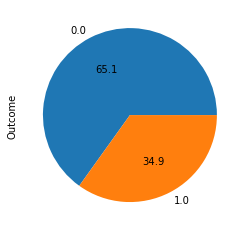

In [11]:
diabetes["Outcome"].value_counts().plot.pie(autopct = "%.1f")

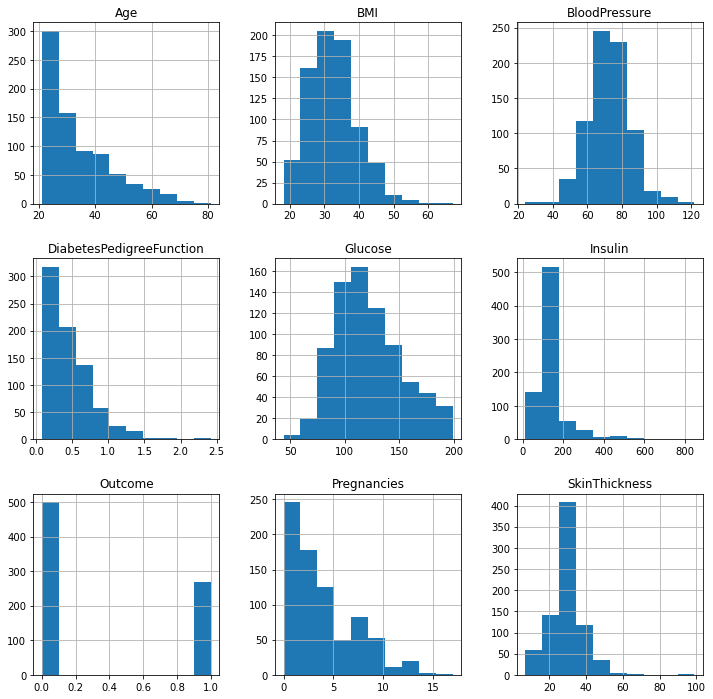

In [12]:
numbers = pd.Series(diabetes.columns)
diabetes[numbers].hist(figsize = (12, 12))
plt.show()

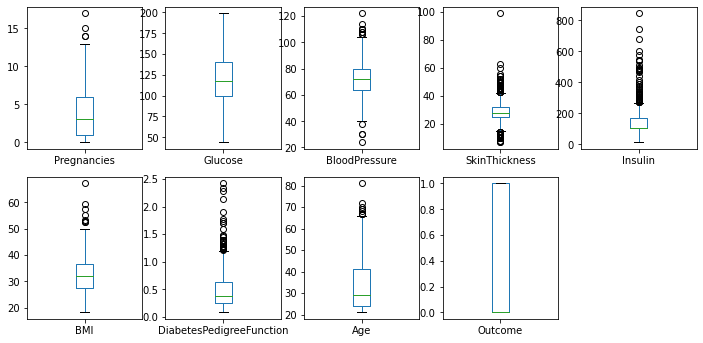

In [13]:
#boxplot
diabetes.plot(kind = 'box', subplots = True, layout = (4, 5), sharex = False, sharey = False, figsize = (12, 12));


plt.show()
#ax = sns.boxplot(x="BloodPressure", hue="Outcome", data=diabetes, palette="Set3")

C:\Users\14830\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\14830\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:220: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)
C:\Users\14830\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must s

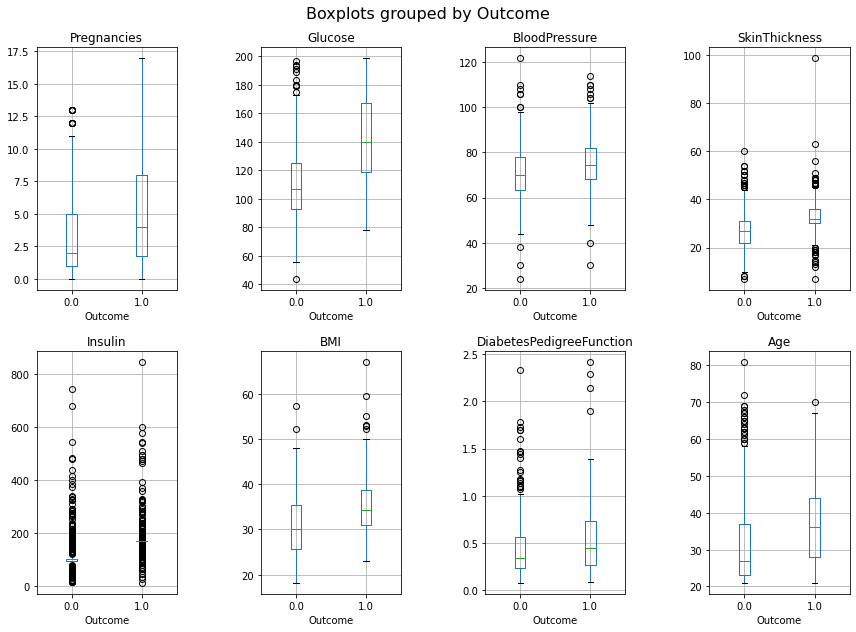

In [14]:
fig, axes = plt.subplots(figsize=(12, 8), nrows = 2, ncols = 4, constrained_layout=True)

diabetes.boxplot(column= 'Pregnancies', by= "Outcome", ax=axes[0,0])
diabetes.boxplot(column= 'Glucose', by = "Outcome", ax=axes[0,1])
diabetes.boxplot(column= 'BloodPressure', by = "Outcome", ax=axes[0,2])
diabetes.boxplot(column= 'SkinThickness', by = "Outcome", ax=axes[0,3])
diabetes.boxplot(column= 'Insulin', by = "Outcome", ax=axes[1,0])
diabetes.boxplot(column= 'BMI', by = "Outcome", ax=axes[1,1])
diabetes.boxplot(column='DiabetesPedigreeFunction', by = "Outcome", ax=axes[1,2])
diabetes.boxplot(column= 'Age', by = "Outcome", ax=axes[1,3])

fig.suptitle('Boxplots grouped by Outcome', y=1.17, fontsize = 16)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=0.15, right=None, top=1.1, wspace=0.6, hspace=0.25)
plt.show()

### Correlation Matrix

In [15]:
diabetes.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,14.35000,25.00000,28.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,141.753906,89.100847,14.000,50.00000,102.50000,102.5000,169.50000,210.0000,293.00000,519.90000,846.00
BMI,768.0,32.434635,6.880498,18.200,22.23500,27.50000,32.0500,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [16]:
diabetes.corr().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.09,0.06,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.23,0.23,0.49,0.24,0.14,0.27,0.50
BloodPressure,0.21,0.23,1.00,0.20,0.07,0.29,-0.00,0.33,0.17
SkinThickness,0.09,0.23,0.20,1.00,0.20,0.57,0.11,0.13,0.30
Insulin,0.06,0.49,0.07,0.20,1.00,0.24,0.15,0.12,0.38
BMI,0.02,0.24,0.29,0.57,0.24,1.00,0.15,0.03,0.32
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.11,0.15,0.15,1.00,0.03,0.17
Age,0.54,0.27,0.33,0.13,0.12,0.03,0.03,1.00,0.24
Outcome,0.22,0.50,0.17,0.30,0.38,0.32,0.17,0.24,1.00


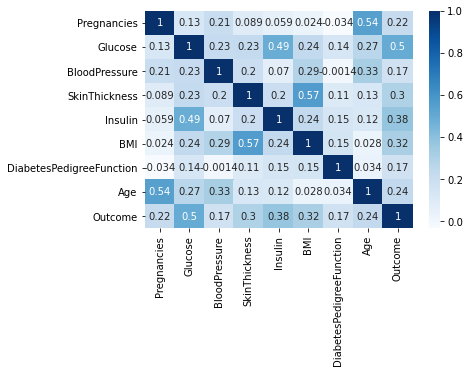

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(diabetes.corr(),cmap='Blues',annot=True)

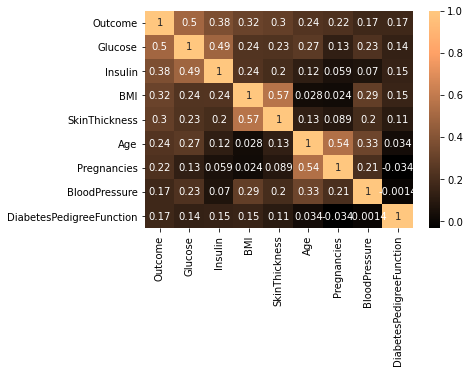

<Figure size 720x432 with 0 Axes>

In [18]:
#Outcome correlation matrix
#number of variables for heatmap
k = 9
cols = diabetes.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = diabetes[cols].corr()
sns.heatmap(cm, annot=True, cmap = 'copper')
plt.figure(figsize=(10,6))
plt.show()

### Feature Engineering

In [19]:
diabetes1 = diabetes.copy()

In [20]:
#Glucose
diabetes1['New_Glucose'] = pd.cut(x=diabetes1['Glucose'], bins=[0,70,99,126,200],labels = ["Low", "Normal", "Overweight", "High"])

#SkinThickness
diabetes1['New_SkinThickness'] = diabetes1['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

#Insulin
def insulin_col(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
    
diabetes1["New_Insulin"] = diabetes1.apply(insulin_col, axis=1)

#BMI
diabetes1['New_BMI_Range'] = pd.cut(x=diabetes1['BMI'], bins=[0,18.5,24.9,29.9,34.9,39.9,100], labels = ['Underweight','Healty','Overweight', 'Obesity', 'Morbid Obesity', 'Super Obesity'])

display(diabetes1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_SkinThickness,New_Insulin,New_BMI_Range
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,High,0,Abnormal,Obesity
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Normal,0,Normal,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,High,0,Abnormal,Healty
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,0,Normal,Overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,High,0,Abnormal,Super Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,Overweight,0,Abnormal,Obesity
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27.0,0.0,Overweight,0,Normal,Morbid Obesity
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,Overweight,0,Normal,Overweight
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47.0,1.0,Overweight,0,Abnormal,Obesity


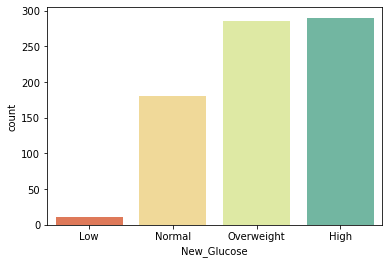

In [21]:
sns.countplot(x='New_Glucose', data=diabetes1, palette='Spectral', order = ["Low", "Normal", "Overweight", "High"])

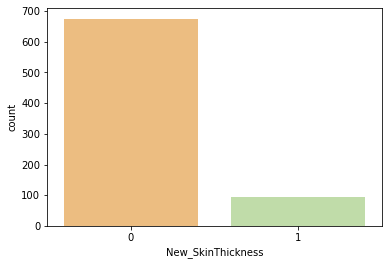

In [22]:
sns.countplot(x='New_SkinThickness', data=diabetes1, palette='Spectral')

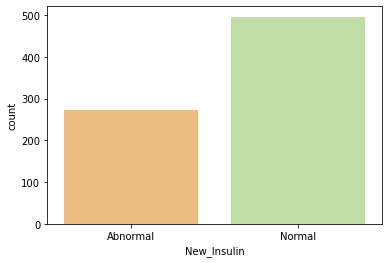

In [23]:
sns.countplot(x='New_Insulin', data=diabetes1, palette='Spectral', order = ['Abnormal','Normal'])

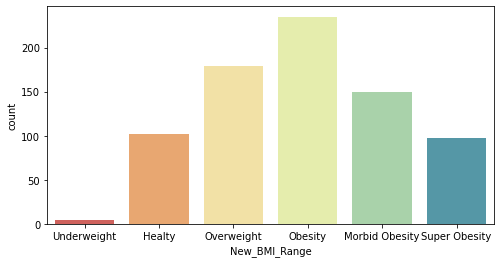

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(x='New_BMI_Range', data=diabetes1, palette='Spectral', order = ['Underweight','Healty','Overweight', 'Obesity', 'Morbid Obesity', 'Super Obesity'])

In [25]:
#One-hot Encoding
#diabetes1 = pd.get_dummies(diabetes1, columns =['New_Glucose','New_Insulin','New_BMI_Range'], drop_first = True)
#display(diabetes1)

## Modeling by Original Data 

In [26]:
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction","Age"]
x = diabetes1[features]
y = diabetes1['Outcome']

#### KNN

In [27]:
#Split the data into 80% training and 20% testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
#start timer
startTime = perf_counter()
#knn = KNeighborsClassifier(random_state = 42).fit(X_train1, y_train1)

print("-------------------------------")
print("KNeighbors Classifier: ")
print("-------------------------------")

#knn_trainScore1 = knn.score(X_train1, y_train1)
#knn_testScore1 = knn.score(X_test1, y_test1)
#print("Train Score:", knn_trainScore1)
#print("Test Score:", knn_testScore1)

kList = np.arange(start=1, stop=51, step=1)
knn_trainScore1 = []
knn_testScore1 = []
cv_knnlst1 = []
#training_accuracy1 = []
#test_accuracy1 = []

for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1,y_train1)
    #y_pred_knn_train1 = knn.predict(X_train1)
    #y_pred_knn_test1 = knn.predict(X_test1)
    #Using cross validation
    #cv_knn = cross_val_score(knn, x, y, cv=ShuffleSplit(n_splits=50, test_size=0.20), scoring = 'accuracy')
    #cv_knn = cross_val_score(knn, X_test1, y_test1, cv=ShuffleSplit(n_splits=50, test_size=0.20), scoring = 'accuracy')
    #cv_knnlst1.append(cv_knn)
    #knn_trainScore1 = knn.score(X_train1, y_train1)
    #knn_testScore1 = knn.score(X_test1, y_test1)
    
    # record train accuracy
    knn_trainScore1.append(knn.score(X_train1, y_train1))
    #training_accuracy1.append(knn_trainScore1)
    # record test accuracy
    knn_testScore1.append(knn.score(X_test1, y_test1))
    #test_accuracy1.append(knn_testScore1)


#Using cross validation
cv_knn = cross_val_score(knn, x, y, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_knn = cross_val_score(knn,X_test, y_test, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_knn)

dataframe1 = {'Neighbor Sizes': kList,
             'Train Set Score': knn_trainScore1,
             'Test Set Score': knn_testScore1}
 
table1 = pd.DataFrame(dataframe1)
table1 = table1.set_index('Neighbor Sizes')
#table1 = table1.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
table1 = table1.sort_values("Test Set Score", ascending=False)
#table1 = table1.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table1)
    
#confusion matrix
y_pred_knn_test1 = cross_val_predict(knn, X_test1, y_test1, cv=50)
print(" ")
classificationSummary(y_test1, y_pred_knn_test1)

print(" ")
ps_knn = precision_score(y_test1, y_pred_knn_test1, average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_knn[0])
print("precision Score(y = 1):",ps_knn[1])

print(" ")
rs_knn = recall_score(y_test1, y_pred_knn_test1, average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_knn[0])
print("recall Score(y = 1):",rs_knn[1])

regressionSummary(y_test1, y_pred_knn_test1)
me_knn = round(np.mean(y_test1 - y_pred_knn_test1), 4)
rmse_knn = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_knn_test1)), 4)
mae_knn = round(metrics.mean_absolute_error(y_test1, y_pred_knn_test1), 4)

#end timer
endTime = perf_counter()
time1 = endTime-startTime
print("Total time:", time1)

-------------------------------
KNeighbors Classifier: 
-------------------------------
Test Score(Cross Validation): 0.8396753246753247


,Train Set Score,Test Set Score
Neighbor Sizes,,
2,0.921824,0.863636
1,1.000000,0.857143
11,0.881107,0.850649
10,0.885993,0.850649
12,0.879479,0.844156
8,0.890879,0.844156
14,0.882736,0.837662
13,0.884365,0.837662
4,0.907166,0.831169


 
Confusion Matrix (Accuracy 0.8442)

       Prediction
Actual  0  1
     0 84 15
     1  9 46
 
Precision Score:
precision Score(y = 0): 0.9032258064516129
precision Score(y = 1): 0.7540983606557377
 
Recall Score:
recall Score(y = 0): 0.8484848484848485
recall Score(y = 1): 0.8363636363636363

Regression statistics

               Mean Error (ME) : -0.0390
Root Mean Squared Error (RMSE) : 0.3948
     Mean Absolute Error (MAE) : 0.1558
Total time: 11.289973799999999


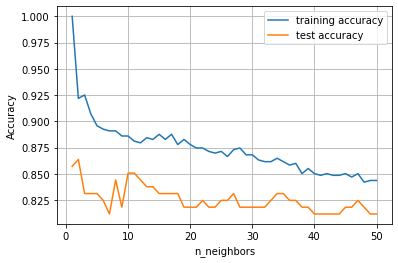

In [29]:
plt.plot(kList, knn_trainScore1, label="training accuracy") 
plt.plot(kList, knn_testScore1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()
plt.show()

In [30]:
# choose the best parameter with cross-validation
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(X_train1, y_train1)

cv_knn2 = cross_validate(knn2, x, y, cv=ShuffleSplit(n_splits=500, test_size=.2), return_train_score=True)
knn2_train = np.mean(cv_knn2['train_score'])
knn2_test = np.mean(cv_knn2['test_score'])

print('Train Score',"{:.4%}".format(knn2_train))
print('Test Score',"{:.4%}".format(knn2_test))

Train Score 92.1723%
Test Score 85.8377%


#### Naive Bayes

In [31]:
#start timer
startTime = perf_counter()
gnb = GaussianNB().fit(X_train1, y_train1)

print("-------------------------------")
print("Gaussian Naive Bayes: ")
print("-------------------------------")

gnb_trainScore1 = gnb.score(X_train1, y_train1)
gnb_testScore1 = gnb.score(X_test1, y_test1)
print("Train Score:", gnb_trainScore1)
print("Test Score:", gnb_testScore1)

#Using cross validation
cv_gnb = cross_val_score(gnb, x, y, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_gnb = cross_val_score(gnb, X_test1, y_test1, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_gnb)

#confusion matrix
y_pred_gnb_test1 = cross_val_predict(gnb, X_test1, y_test1, cv=50)
print(" ")
classificationSummary(y_test1, y_pred_gnb_test1)

print(" ")
ps_gnb = precision_score(y_test1, y_pred_gnb_test1,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_gnb[0])
print("precision Score(y = 1):",ps_gnb[1])

print(" ")
rs_gnb = recall_score(y_test1, y_pred_gnb_test1,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_gnb[0])
print("recall Score(y = 1):",rs_gnb[1])

regressionSummary(y_test1, y_pred_gnb_test1)
me_gnb = round(np.mean(y_test1 - y_pred_gnb_test1), 4)
rmse_gnb = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_gnb_test1)), 4)
mae_gnb = round(metrics.mean_absolute_error(y_test1, y_pred_gnb_test1), 4)

#end timer
endTime = perf_counter()
time2 = endTime-startTime
print("Total time:", time2)

-------------------------------
Gaussian Naive Bayes: 
-------------------------------
Train Score: 0.7671009771986971
Test Score: 0.7662337662337663
Test Score(Cross Validation): 0.7644415584415585
 
Confusion Matrix (Accuracy 0.7792)

       Prediction
Actual  0  1
     0 84 15
     1 19 36
 
Precision Score:
precision Score(y = 0): 0.8155339805825242
precision Score(y = 1): 0.7058823529411765
 
Recall Score:
recall Score(y = 0): 0.8484848484848485
recall Score(y = 1): 0.6545454545454545

Regression statistics

               Mean Error (ME) : 0.0260
Root Mean Squared Error (RMSE) : 0.4699
     Mean Absolute Error (MAE) : 0.2208
Total time: 4.014193900000009


#### Logistic

In [32]:
#start timer
startTime = perf_counter()
log = LogisticRegression(solver="liblinear").fit(X_train1, y_train1)

print("-------------------------------")
print("Logistic Regression: ")
print("-------------------------------")

log_trainScore1 = log.score(X_train1, y_train1)
log_testScore1 = log.score(X_test1, y_test1)
print("Train Score:", log_trainScore1)
print("Test Score:", log_testScore1)

#Using cross validation
cv_log = cross_val_score(log, x, y, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_log = cross_val_score(log_pca, X_test1, y_test1, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_log)

#confusion matrix
y_pred_log_test1 = cross_val_predict(log, X_test1, y_test1, cv=50)
print(" ")
classificationSummary(y_test1, y_pred_log_test1)

print(" ")
ps_log = precision_score(y_test1, y_pred_log_test1,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_log[0])
print("precision Score(y = 1):",ps_log[1])

print(" ")
rs_log = recall_score(y_test1, y_pred_log_test1, average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_log[0])
print("recall Score(y = 1):",rs_log[1])

regressionSummary(y_test1, y_pred_log_test1)
me_log = round(np.mean(y_test1 - y_pred_log_test1), 4)
rmse_log = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_log_test1)), 4)
mae_log = round(metrics.mean_absolute_error(y_test1, y_pred_log_test1), 4)

#end timer
endTime = perf_counter()
time3 = endTime-startTime
print("Total time:", time3)

-------------------------------
Logistic Regression: 
-------------------------------
Train Score: 0.7638436482084691
Test Score: 0.7792207792207793
Test Score(Cross Validation): 0.7685324675324675
 
Confusion Matrix (Accuracy 0.8312)

       Prediction
Actual  0  1
     0 89 10
     1 16 39
 
Precision Score:
precision Score(y = 0): 0.8476190476190476
precision Score(y = 1): 0.7959183673469388
 
Recall Score:
recall Score(y = 0): 0.898989898989899
recall Score(y = 1): 0.7090909090909091

Regression statistics

               Mean Error (ME) : 0.0390
Root Mean Squared Error (RMSE) : 0.4109
     Mean Absolute Error (MAE) : 0.1688
Total time: 6.677235200000013


#### Decision Tree

In [33]:
#start timer
startTime = perf_counter()
tree = DecisionTreeClassifier(random_state=42).fit(X_train1, y_train1)

print("-------------------------------")
print("Decision Tree Classifier: ")
print("-------------------------------")

tree_trainScore1 = tree.score(X_train1, y_train1)
tree_testScore1 = tree.score(X_test1, y_test1)
print("Train Score:", tree_trainScore1)
print("Test Score:", tree_testScore1)

#Using cross validation
cv_tree = cross_val_score(tree, x, y, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_tree = cross_val_score(tree, X_test1, y_test1, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_tree)

#confusion matrix
y_pred_tree_test1 = cross_val_predict(tree, X_test1, y_test1, cv=50)
print(" ")
classificationSummary(y_test1, y_pred_tree_test1)

print(" ")
ps_tree = precision_score(y_test1, y_pred_tree_test1,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_tree[0])
print("precision Score(y = 1):",ps_tree[1])

print(" ")
rs_tree = recall_score(y_test1, y_pred_tree_test1,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_tree[0])
print("recall Score(y = 1):",rs_tree[1])

regressionSummary(y_test1, y_pred_tree_test1)
me_tree = round(np.mean(y_test1 - y_pred_tree_test1), 4)
rmse_tree = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_tree_test1)), 4)
mae_tree = round(metrics.mean_absolute_error(y_test1, y_pred_tree_test1), 4)

#end timer
endTime = perf_counter()
time4 = endTime-startTime
print("Total time:", time4)

-------------------------------
Decision Tree Classifier: 
-------------------------------
Train Score: 1.0
Test Score: 0.8376623376623377
Test Score(Cross Validation): 0.8436493506493506
 
Confusion Matrix (Accuracy 0.7662)

       Prediction
Actual  0  1
     0 84 15
     1 21 34
 
Precision Score:
precision Score(y = 0): 0.8
precision Score(y = 1): 0.6938775510204082
 
Recall Score:
recall Score(y = 0): 0.8484848484848485
recall Score(y = 1): 0.6181818181818182

Regression statistics

               Mean Error (ME) : 0.0390
Root Mean Squared Error (RMSE) : 0.4835
     Mean Absolute Error (MAE) : 0.2338
Total time: 5.111646399999984


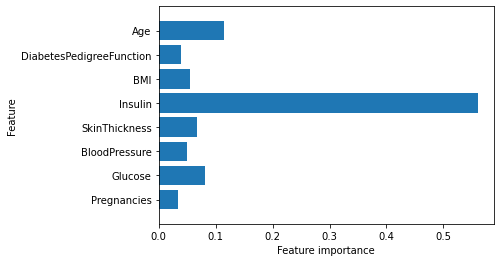

In [34]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

#### Random Forest

In [35]:
#start timer
startTime = perf_counter()
forest = RandomForestClassifier(random_state=42).fit(X_train1, y_train1)

print("-------------------------------")
print("Random Forest Classifier: ")
print("-------------------------------")

forest_trainScore1 = forest.score(X_train1, y_train1)
forest_testScore1 = forest.score(X_test1, y_test1)
print("Train Score:", forest_trainScore1)
print("Test Score:", forest_testScore1)

#Using cross validation
cv_forest = cross_val_score(forest, x, y, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_forest = cross_val_score(forest, X_test1, y_test1, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_forest)

#confusion matrix
y_pred_forest_test1 = cross_val_predict(forest, X_test1, y_test1, cv=50)
print(" ")
classificationSummary(y_test1, y_pred_forest_test1)

print(" ")
ps_forest = precision_score(y_test1, y_pred_forest_test1,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_forest[0])
print("precision Score(y = 1):",ps_forest[1])

print(" ")
rs_forest = recall_score(y_test1, y_pred_forest_test1,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_forest[0])
print("recall Score(y = 1):",rs_forest[1])

regressionSummary(y_test1, y_pred_forest_test1)
me_forest = round(np.mean(y_test1 - y_pred_forest_test1), 4)
rmse_forest = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_forest_test1)), 4)
mae_forest = round(metrics.mean_absolute_error(y_test1, y_pred_forest_test1), 4)

#end timer
endTime = perf_counter()
time5 = endTime-startTime
print("Total time:", time5)

-------------------------------
Random Forest Classifier: 
-------------------------------
Train Score: 1.0
Test Score: 0.8831168831168831
Test Score(Cross Validation): 0.8798831168831168
 
Confusion Matrix (Accuracy 0.8312)

       Prediction
Actual  0  1
     0 87 12
     1 14 41
 
Precision Score:
precision Score(y = 0): 0.8613861386138614
precision Score(y = 1): 0.7735849056603774
 
Recall Score:
recall Score(y = 0): 0.8787878787878788
recall Score(y = 1): 0.7454545454545455

Regression statistics

               Mean Error (ME) : 0.0130
Root Mean Squared Error (RMSE) : 0.4109
     Mean Absolute Error (MAE) : 0.1688
Total time: 133.9403681


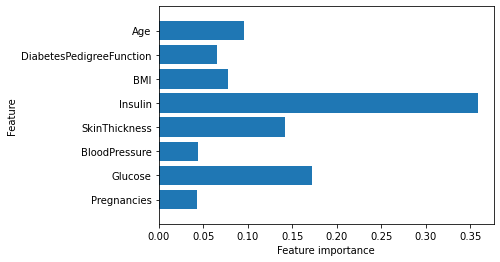

In [36]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

#### Gradient Boosting

In [37]:
#start timer
startTime = perf_counter()
gbc = GradientBoostingClassifier(random_state=42).fit(X_train1, y_train1)

print("-------------------------------")
print("Random Forest Classifier: ")
print("-------------------------------")

gbc_trainScore1 = gbc.score(X_train1, y_train1)
gbc_testScore1 = gbc.score(X_test1, y_test1)
print("Train Score:", gbc_trainScore1)
print("Test Score:", gbc_testScore1)

#Using cross validation
cv_gbc = cross_val_score(gbc, x, y, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_gbc = cross_val_score(gbc, X_test1, y_test1, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_gbc)

#confusion matrix
y_pred_gbc_test1 = cross_val_predict(gbc, X_test1, y_test1, cv=50)
print(" ")
classificationSummary(y_test1, y_pred_gbc_test1)

print(" ")
ps_gbc = precision_score(y_test1, y_pred_gbc_test1,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_gbc[0])
print("precision Score(y = 1):",ps_gbc[1])

print(" ")
rs_gbc = recall_score(y_test1, y_pred_gbc_test1,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_gbc[0])
print("recall Score(y = 1):",rs_gbc[1])

regressionSummary(y_test1, y_pred_gbc_test1)
me_gbc = round(np.mean(y_test1 - y_pred_gbc_test1), 4)
rmse_gbc = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_gbc_test1)), 4)
mae_gbc = round(metrics.mean_absolute_error(y_test1, y_pred_gbc_test1), 4)

#end timer
endTime = perf_counter()
time6 = endTime-startTime
print("Total time:", time6)

-------------------------------
Random Forest Classifier: 
-------------------------------
Train Score: 0.993485342019544
Test Score: 0.8701298701298701
Test Score(Cross Validation): 0.8806103896103896
 
Confusion Matrix (Accuracy 0.8247)

       Prediction
Actual  0  1
     0 86 13
     1 14 41
 
Precision Score:
precision Score(y = 0): 0.86
precision Score(y = 1): 0.7592592592592593
 
Recall Score:
recall Score(y = 0): 0.8686868686868687
recall Score(y = 1): 0.7454545454545455

Regression statistics

               Mean Error (ME) : 0.0065
Root Mean Squared Error (RMSE) : 0.4187
     Mean Absolute Error (MAE) : 0.1753
Total time: 96.7053813


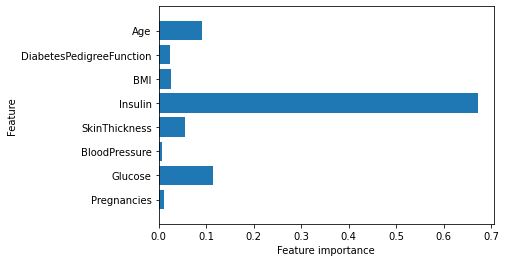

In [38]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbc)

### Data Reduction: PCA

In [39]:
# Standardizing the features
X = StandardScaler().fit_transform(x)
pca1 = PCA()
pca1.fit_transform(X)

#principalcomponents = pca1.fit(X)
#principalcomponents = pca1.transform(X)
#principalcomponents.fit(X.iloc[:, :].dropna(axis=0))

num_components1 = len(pca1.explained_variance_ratio_)
ind = np.arange(num_components1)
vals = pca1.explained_variance_ratio_
cumvals = np.cumsum(vals)

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca1.explained_variance_),
                           'Proportion of variance': pca1.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca1.explained_variance_ratio_)})
pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['pca{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary.round(4)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Standard deviation,1.5455,1.2256,1.0604,0.9550,0.8747,0.7110,0.6604,0.6137
Proportion of variance,0.2982,0.1875,0.1404,0.1138,0.0955,0.0631,0.0544,0.0470
Cumulative proportion,0.2982,0.4857,0.6261,0.7399,0.8354,0.8985,0.9530,1.0000


C:\Users\14830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\14830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes: Explained Variance per Principal Component')

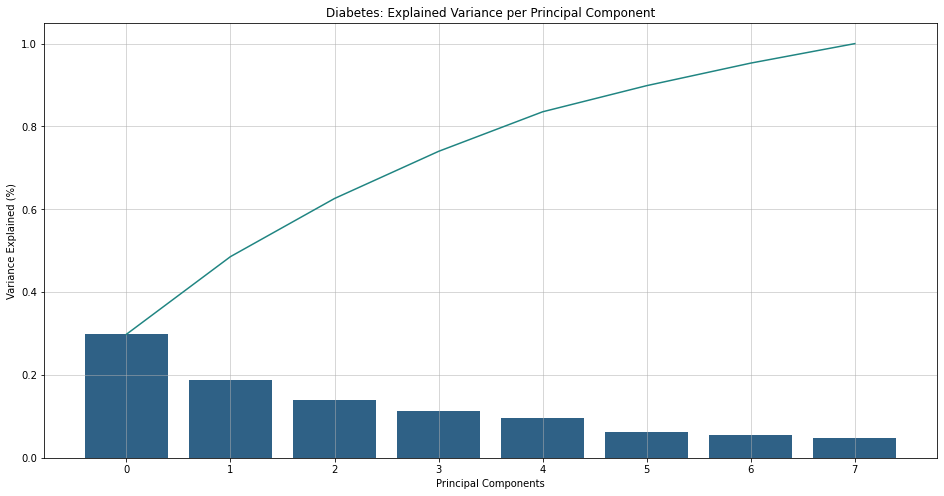

In [40]:
# Scree plot (variance explained by each principal component)
color_use = ['#206394','#208582','#42c4c7','#8786a7','#f6cd61','#fe8a71','#ED4534','#BC342C']
plt.figure(figsize=(16,8))
ax = sns.barplot(ind, vals, palette=color_use[:1], ci=None)
ax2 = sns.lineplot(ind, cumvals, color=color_use[1], ci=None)
ax.grid(b=True, which='major', linewidth=0.5)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel("Principal Components")
ax.set_ylabel("Variance Explained (%)")
plt.title('Diabetes: Explained Variance per Principal Component')

In [41]:
#reduce deminsion to X only
num_components2 = len(cumvals[cumvals <= 0.80])
print(num_components2)

# rerun PCA with components that explain 80% of the variance
pca2 = PCA(n_components = num_components2, whiten=True)
principalcomponents = pca2.fit_transform(X)
#principalcomponents = pca1.fit(X)
#principalcomponents = pca1.transform(X)
#principalcomponents = pca2.fit_transform(X_train_pca)
np.cumsum(pca2.explained_variance_ratio_)

4


array([0.29817668, 0.48570241, 0.62606744, 0.73991119])

In [42]:
#diabetesPCA_des = pd.DataFrame(pca1.components_.transpose(), columns=pcaSummary.columns, index=x.columns)
#diabetesPCA_des.iloc[:, :2]
#diabetesPCA_des = diabetesPCA_des.iloc[:,:2]
#display(diabetesPCA_des)

In [43]:
pcaDF = pd.DataFrame(data = principalcomponents[:, 0:4], columns = pcaSummary.columns.tolist()[0:4])

In [44]:
#new dataset using PCA
diabetesPCA = pd.concat([pcaDF, y], axis = 1)
display(diabetesPCA)

,pca1,pca2,pca3,pca4,Outcome
0,1.019595,-0.500532,0.417502,0.433301,1.0
1,-1.019699,0.064977,-0.321451,0.001115,0.0
2,0.475286,-0.443413,1.722515,0.108900,1.0
3,-1.378927,0.218064,-0.354564,-0.662579,0.0
4,0.520684,2.861177,1.960060,4.858117,1.0
...,...,...,...,...,...
763,1.377576,-1.646082,-1.120050,-0.059504,0.0
764,-0.303980,0.495480,-0.439911,-0.383012,0.0
765,-0.578845,-0.682969,0.216956,-0.531610,0.0
766,-0.045925,-0.003569,0.529178,-0.371287,1.0


In [45]:
#diabetes1['Outcome'] = diabetes1['Outcome'].astype(float)
print(diabetesPCA.dtypes)

pca1       float64
pca2       float64
pca3       float64
pca4       float64
Outcome    float64
dtype: object


In [46]:
#count numbers for Outcome
for i in set(diabetesPCA['Outcome']):
    print(str(i)+' : '+str(sum([x == i for x in list(diabetesPCA['Outcome'])])))

0.0 : 500
1.0 : 268


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F964E66D0>,
      dtype=object)

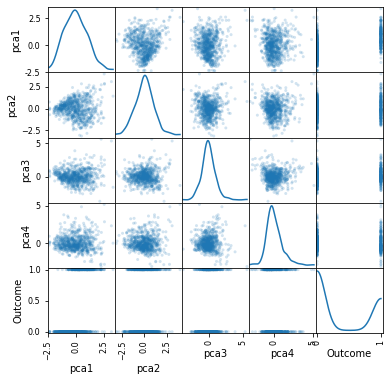

In [47]:
from pandas.plotting import scatter_matrix

#now plot using pandas 
#scatter_matrix(diabetesPCA.drop(['Outcome'], axis=1), alpha=0.2, figsize=(6, 6), diagonal='kde')
scatter_matrix(diabetesPCA, alpha=0.2, figsize=(6, 6), diagonal='kde')

Text(0.5, 0.98, '4 components PCA')

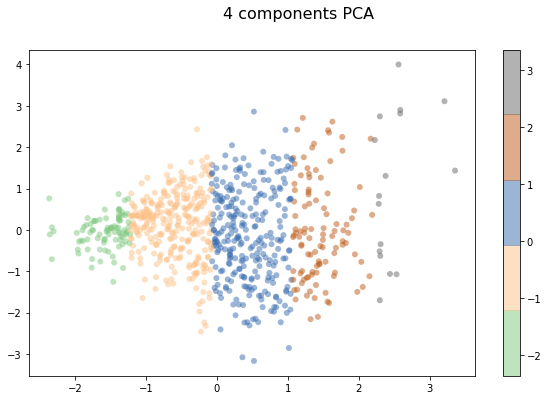

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(principalcomponents[:, 0], principalcomponents[:,1],
            c=list(diabetesPCA['pca1']), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 5))
#plt.xlabel('component 1')
#plt.ylabel('component 2')
#plt.ylabel('component 3')
#plt.ylabel('component 4')
plt.colorbar()
plt.suptitle("4 components PCA", fontsize=16)

Text(0.5, 0.92, 'Media Panel_Moviegoing -- HDBSCAN')

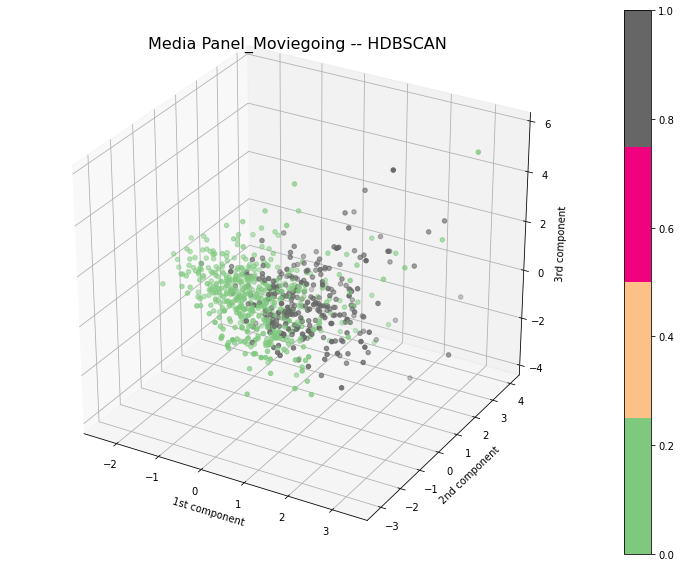

In [49]:
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')
xdata = principalcomponents[:, 0]
ydata = principalcomponents[:, 1]
zdata = principalcomponents[:, 2]
img = ax.scatter3D(xdata, ydata, zdata, c = diabetesPCA['Outcome'], cmap = plt.cm.get_cmap('Accent', 4))
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')
fig.colorbar(img)
plt.title("Media Panel_Moviegoing -- HDBSCAN", fontsize=16)

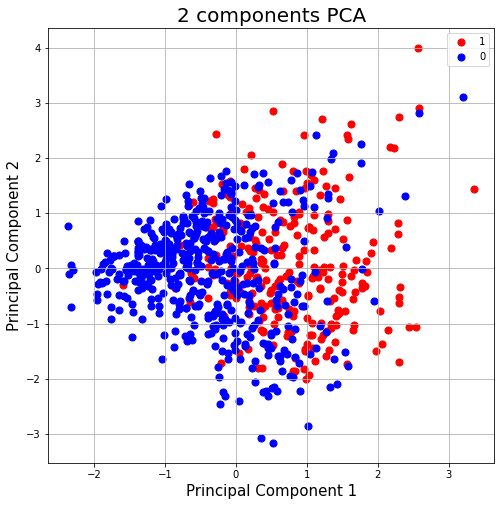

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
#targets = ['pca1', 'pca2']
Outcomes = [1, 0]
colors = ['r', 'b']
for Outcome, color in zip(Outcomes,colors):
    indicesToKeep = diabetesPCA['Outcome'] == Outcome
    ax.scatter(diabetesPCA.loc[indicesToKeep, 'pca1']
               , diabetesPCA.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(Outcomes)
ax.grid()

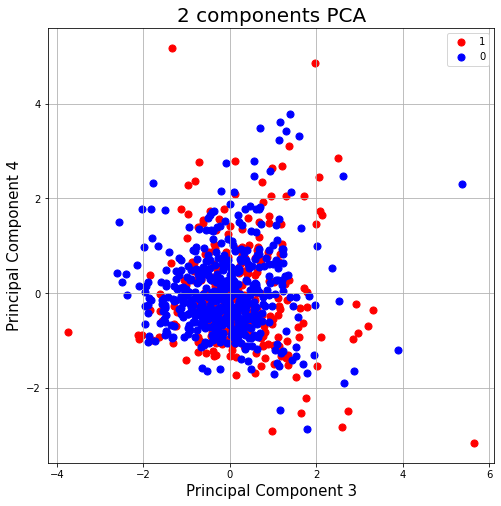

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
#targets = ['pca1', 'pca2']
Outcomes = [1, 0]
colors = ['r', 'b']
for Outcome, color in zip(Outcomes,colors):
    indicesToKeep = diabetesPCA['Outcome'] == Outcome
    ax.scatter(diabetesPCA.loc[indicesToKeep, 'pca3']
               , diabetesPCA.loc[indicesToKeep, 'pca4']
               , c = color
               , s = 50)
ax.legend(Outcomes)
ax.grid()

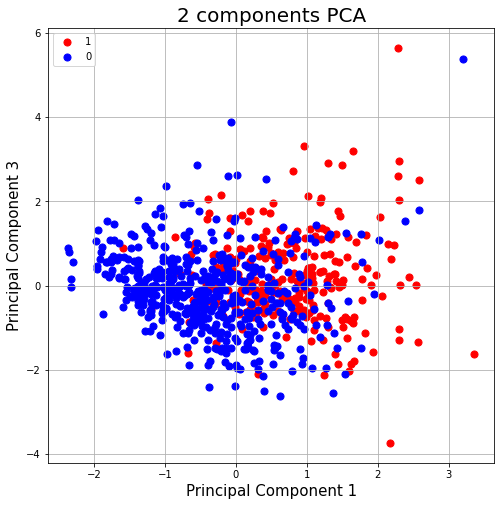

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
#targets = ['pca1', 'pca2']
Outcomes = [1, 0]
colors = ['r', 'b']
for Outcome, color in zip(Outcomes,colors):
    indicesToKeep = diabetesPCA['Outcome'] == Outcome
    ax.scatter(diabetesPCA.loc[indicesToKeep, 'pca1']
               , diabetesPCA.loc[indicesToKeep, 'pca3']
               , c = color
               , s = 50)
ax.legend(Outcomes)
ax.grid()

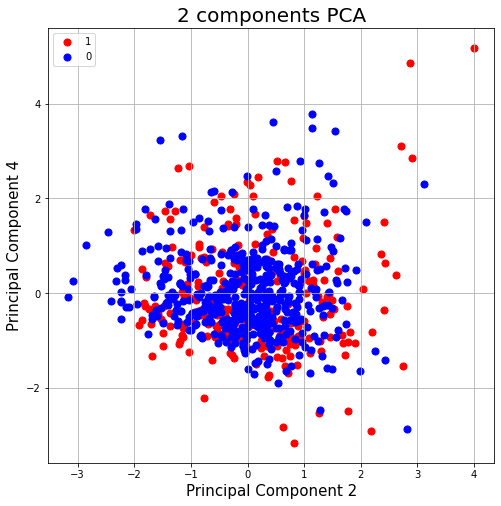

In [53]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
#targets = ['pca1', 'pca2']
Outcomes = [1, 0]
colors = ['r', 'b']
for Outcome, color in zip(Outcomes,colors):
    indicesToKeep = diabetesPCA['Outcome'] == Outcome
    ax.scatter(diabetesPCA.loc[indicesToKeep, 'pca2']
               , diabetesPCA.loc[indicesToKeep, 'pca4']
               , c = color
               , s = 50)
ax.legend(Outcomes)
ax.grid()

In [54]:
print(pca1.explained_variance_ratio_)

[0.29817668 0.18752573 0.14036503 0.11384376 0.09551291 0.06311189
 0.05444859 0.04701541]


In [55]:
#variance = pd.DataFrame(pca1.explained_variance_ratio_)
print(np.cumsum(pca1.explained_variance_ratio_))

[0.29817668 0.48570241 0.62606744 0.73991119 0.83542411 0.898536
 0.95298459 1.        ]


In [56]:
# x and y value using PCA
PCA_features = ['pca1','pca2','pca3','pca4']
Xpca = diabetesPCA[PCA_features]
yPCA = diabetesPCA["Outcome"]

In [57]:
#Split the data into 80% training and 20% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xpca, yPCA, test_size=0.2, random_state=42)

## Modeling by using PCA

#### KNN

In [58]:
#start timer
startTime = perf_counter()

#knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train2, y_train2)

print("-------------------------------")
print("KNeighbors Classifier(PCA): ")
print("-------------------------------")

#knn_trainScore2 = knn.score(X_train2, y_train2)
#knn_testScore2 = knn.score(X_test2, y_test2)
#print("Train Score:", knn_trainScore2)
#print("Test Score:", knn_testScore2)

kList = np.arange(start=1, stop=51, step=1)
knn_trainScore2 = []
knn_testScore2 = []
cv_knnlst2 = []
#training_accuracy2 = []
#test_accuracy2 = []

for k in kList:
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_train2,y_train2)
    #y_pred_knn_train2 = knn_pca.predict(X_train2)
    #y_pred_knn_test2 = knn_pca.predict(X_test2)
    #Using cross validation
    #cv_knn_pca = cross_val_score(knn_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=50, test_size=0.20), scoring = 'accuracy')
    #cv_knn_pca = cross_val_score(knn_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=50, test_size=0.20), scoring = 'accuracy')
    #cv_knnlst2.append(cv_knn_pca)
    #knn_trainScore2 = knn_pca.score(X_train2, y_train2)
    #knn_testScore2 = knn_pca.score(X_test2, y_test2)
    
    # record train accuracy
    knn_trainScore2.append(knn_pca.score(X_train2, y_train2))
    #training_accuracy.append(knn_trainScore)
    # record test accuracy
    knn_testScore2.append(knn_pca.score(X_test2, y_test2))
    #test_accuracy.append(knn_testScore)


#Using cross validation
cv_knn_pca = cross_val_score(knn_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_knn_pca = cross_val_score(knn_pca,X_test, y_test, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_knn_pca)

dataframe1_pca = {'Neighbor Sizes': kList,
             'Train Set Score': knn_trainScore2,
             'Test Set Score': knn_testScore2}
 
table1_pca = pd.DataFrame(dataframe1_pca)
table1_pca = table1_pca.set_index('Neighbor Sizes')
#table1_pca = table1_pca.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
table1_pca = table1_pca.sort_values("Test Set Score", ascending=False)
#table1_pca = table1_pca.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table1_pca)
    
#confusion matrix
y_pred_knn_test2 = cross_val_predict(knn_pca, X_test2, y_test2, cv=50)
print(" ")
classificationSummary(y_test2, y_pred_knn_test2)

print(" ")
ps_knn_pca = precision_score(y_test2, y_pred_knn_test2, average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_knn_pca[0])
print("precision Score(y = 1):",ps_knn_pca[1])

print(" ")
rs_knn_pca = recall_score(y_test2, y_pred_knn_test2, average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_knn_pca[0])
print("recall Score(y = 1):",rs_knn_pca[1])

regressionSummary(y_test2, y_pred_knn_test2)
me_knn_pca = round(np.mean(y_test2 - y_pred_knn_test2), 4)
rmse_knn_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_knn_test2)), 4)
mae_knn_pca = round(metrics.mean_absolute_error(y_test2, y_pred_knn_test2), 4)

#end timer
endTime = perf_counter()
time7 = endTime-startTime
print("Total time:", time7)

-------------------------------
KNeighbors Classifier(PCA): 
-------------------------------
Test Score(Cross Validation): 0.7815974025974026


,Train Set Score,Test Set Score
Neighbor Sizes,,
25,0.814332,0.824675
26,0.806189,0.818182
27,0.814332,0.818182
40,0.802932,0.818182
39,0.807818,0.818182
23,0.824104,0.811688
41,0.809446,0.811688
38,0.807818,0.811688
29,0.809446,0.811688


 
Confusion Matrix (Accuracy 0.7143)

       Prediction
Actual  0  1
     0 97  2
     1 42 13
 
Precision Score:
precision Score(y = 0): 0.697841726618705
precision Score(y = 1): 0.8666666666666667
 
Recall Score:
recall Score(y = 0): 0.9797979797979798
recall Score(y = 1): 0.23636363636363636

Regression statistics

               Mean Error (ME) : 0.2597
Root Mean Squared Error (RMSE) : 0.5345
     Mean Absolute Error (MAE) : 0.2857
Total time: 11.161147000000028


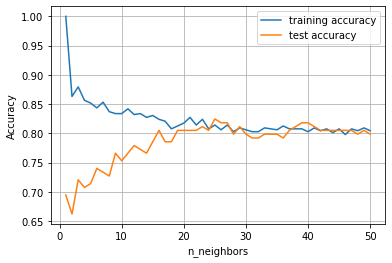

In [59]:
plt.plot(kList, knn_trainScore2, label="training accuracy") 
plt.plot(kList, knn_testScore2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()
plt.show()

In [60]:
# choose the best parameter with cross-validation
knn_pca2 = KNeighborsClassifier(n_neighbors= 25)
knn_pca2.fit(X_train2, y_train2)

cv_knn_pca2 = cross_validate(knn_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=500, test_size=.2), return_train_score=True)
knn_pca2_train = np.mean(cv_knn_pca2['train_score'])
knn_pca2_test = np.mean(cv_knn_pca2['test_score'])

print('Train Score',"{:.4%}".format(knn_pca2_train))
print('Test Score',"{:.4%}".format(knn_pca2_test))

Train Score 81.6248%
Test Score 79.6104%


#### Naive Bayes

In [61]:
#start timer
startTime = perf_counter()
gnb_pca = GaussianNB().fit(X_train2, y_train2)

print("-------------------------------")
print("Gaussian Naive Bayes(PCA): ")
print("-------------------------------")

gnb_trainScore2 = gnb_pca.score(X_train2, y_train2)
gnb_testScore2 = gnb_pca.score(X_test2, y_test2)
print("Train Score:", gnb_trainScore2)
print("Test Score:", gnb_testScore2)

#Using cross validation
cv_gnb_pca = cross_val_score(gnb_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_gnb_pca = cross_val_score(gnb_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_gnb_pca)

#confusion matrix
y_pred_gnb_test2 = cross_val_predict(gnb_pca, X_test2, y_test2, cv=50)
print(" ")
classificationSummary(y_test2, y_pred_gnb_test2)

print(" ")
ps_gnb_pca = precision_score(y_test2, y_pred_gnb_test2,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_gnb_pca[0])
print("precision Score(y = 1):",ps_gnb_pca[1])

print(" ")
rs_gnb_pca = recall_score(y_test2, y_pred_gnb_test2,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_gnb_pca[0])
print("recall Score(y = 1):",rs_gnb_pca[1])

regressionSummary(y_test2, y_pred_gnb_test2)
me_gnb_pca = round(np.mean(y_test2 - y_pred_gnb_test2), 4)
rmse_gnb_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_gnb_test2)), 4)
mae_gnb_pca = round(metrics.mean_absolute_error(y_test2, y_pred_gnb_test2), 4)

#end timer
endTime = perf_counter()
time8 = endTime-startTime
print("Total time:", time8)

-------------------------------
Gaussian Naive Bayes(PCA): 
-------------------------------
Train Score: 0.760586319218241
Test Score: 0.7597402597402597
Test Score(Cross Validation): 0.7589350649350649
 
Confusion Matrix (Accuracy 0.7727)

       Prediction
Actual  0  1
     0 85 14
     1 21 34
 
Precision Score:
precision Score(y = 0): 0.8018867924528302
precision Score(y = 1): 0.7083333333333334
 
Recall Score:
recall Score(y = 0): 0.8585858585858586
recall Score(y = 1): 0.6181818181818182

Regression statistics

               Mean Error (ME) : 0.0455
Root Mean Squared Error (RMSE) : 0.4767
     Mean Absolute Error (MAE) : 0.2273
Total time: 4.007833199999936


#### Logistic

In [62]:
#start timer
startTime = perf_counter()
log_pca = LogisticRegression(solver="liblinear").fit(X_train2, y_train2)

print("-------------------------------")
print("Logistic Regression(PCA): ")
print("-------------------------------")

log_trainScore2 = log_pca.score(X_train2, y_train2)
log_testScore2 = log_pca.score(X_test2, y_test2)
print("Train Score:", log_trainScore2)
print("Test Score:", log_testScore2)

#Using cross validation
cv_log_pca = cross_val_score(log_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_log_pca = cross_val_score(log_pca, X_test, y_test, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_log_pca)

#confusion matrix
y_pred_log_test2 = cross_val_predict(log_pca, X_test2, y_test2, cv=50)
print(" ")
classificationSummary(y_test2, y_pred_log_test2)

print(" ")
ps_log_pca = precision_score(y_test2, y_pred_log_test2,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_log_pca[0])
print("precision Score(y = 1):",ps_log_pca[1])

print(" ")
rs_log_pca = recall_score(y_test2, y_pred_log_test2, average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_log_pca[0])
print("recall Score(y = 1):",rs_log_pca[1])

regressionSummary(y_test2, y_pred_log_test2)
me_log_pca = round(np.mean(y_test2 - y_pred_log_test2), 4)
rmse_log_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_log_test2)), 4)
mae_log_pca = round(metrics.mean_absolute_error(y_test2, y_pred_log_test2), 4)

#end timer
endTime = perf_counter()
time9 = endTime-startTime
print("Total time:", time9)

-------------------------------
Logistic Regression(PCA): 
-------------------------------
Train Score: 0.7752442996742671
Test Score: 0.7662337662337663
Test Score(Cross Validation): 0.7771948051948052
 
Confusion Matrix (Accuracy 0.8247)

       Prediction
Actual  0  1
     0 89 10
     1 17 38
 
Precision Score:
precision Score(y = 0): 0.839622641509434
precision Score(y = 1): 0.7916666666666666
 
Recall Score:
recall Score(y = 0): 0.898989898989899
recall Score(y = 1): 0.6909090909090909

Regression statistics

               Mean Error (ME) : 0.0455
Root Mean Squared Error (RMSE) : 0.4187
     Mean Absolute Error (MAE) : 0.1753
Total time: 3.913380899999993


#### Decision Tree

In [63]:
#start timer
startTime = perf_counter()
tree_pca = DecisionTreeClassifier(random_state=42).fit(X_train2, y_train2)

print("-------------------------------")
print("Decision Tree Classifier(PCA): ")
print("-------------------------------")

tree_trainScore2 = tree_pca.score(X_train2, y_train2)
tree_testScore2 = tree_pca.score(X_test2, y_test2)
print("Train Score:", tree_trainScore2)
print("Test Score:", tree_testScore2)

#Using cross validation
cv_tree_pca = cross_val_score(tree_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_tree_pca = cross_val_score(tree_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_tree_pca)

#confusion matrix
y_pred_tree_test2 = cross_val_predict(tree_pca, X_test2, y_test2, cv=50)
print(" ")
classificationSummary(y_test2, y_pred_tree_test2)

print(" ")
ps_tree_pca = precision_score(y_test2, y_pred_tree_test2,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_tree_pca[0])
print("precision Score(y = 1):",ps_tree_pca[1])

print(" ")
rs_tree_pca = recall_score(y_test2, y_pred_tree_test2,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_tree_pca[0])
print("recall Score(y = 1):",rs_tree_pca[1])

regressionSummary(y_test2, y_pred_tree_test2)
me_tree_pca = round(np.mean(y_test2 - y_pred_tree_test2), 4)
rmse_tree_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_tree_test2)), 4)
mae_tree_pca = round(metrics.mean_absolute_error(y_test2, y_pred_tree_test2), 4)

#end timer
endTime = perf_counter()
time10 = endTime-startTime
print("Total time:", time10)

-------------------------------
Decision Tree Classifier(PCA): 
-------------------------------
Train Score: 1.0
Test Score: 0.7597402597402597
Test Score(Cross Validation): 0.7372727272727273
 
Confusion Matrix (Accuracy 0.7338)

       Prediction
Actual  0  1
     0 75 24
     1 17 38
 
Precision Score:
precision Score(y = 0): 0.8152173913043478
precision Score(y = 1): 0.6129032258064516
 
Recall Score:
recall Score(y = 0): 0.7575757575757576
recall Score(y = 1): 0.6909090909090909

Regression statistics

               Mean Error (ME) : -0.0455
Root Mean Squared Error (RMSE) : 0.5160
     Mean Absolute Error (MAE) : 0.2662
Total time: 4.867532700000083


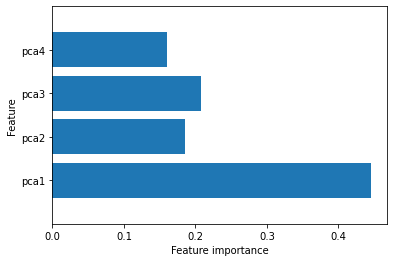

In [64]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree_pca)

#### Random Forest

In [65]:
#start timer
startTime = perf_counter()
forest_pca = RandomForestClassifier(random_state=42,verbose=False).fit(X_train2, y_train2)

print("-------------------------------")
print("Random Forest Classifier(PCA): ")
print("-------------------------------")

forest_trainScore2 = forest_pca.score(X_train2, y_train2)
forest_testScore2 = forest_pca.score(X_test2, y_test2)
print("Train Score:", forest_trainScore2)
print("Test Score:", forest_testScore2)

#Using cross validation
cv_forest_pca = cross_val_score(forest_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_forest_pca = cross_val_score(forest_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=500, test_size=.2), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_forest_pca)

#confusion matrix
y_pred_forest_test2 = cross_val_predict(forest_pca, X_test2, y_test2, cv=50)
print(" ")
classificationSummary(y_test2, y_pred_forest_test2)

print(" ")
ps_forest_pca = precision_score(y_test2, y_pred_forest_test2, average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_forest_pca[0])
print("precision Score(y = 1):",ps_forest_pca[1])

print(" ")
rs_forest_pca = recall_score(y_test2, y_pred_forest_test2, average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_forest_pca[0])
print("recall Score(y = 1):",rs_forest_pca[1])

regressionSummary(y_test2, y_pred_forest_test2)
me_forest_pca = round(np.mean(y_test2 - y_pred_forest_test2), 4)
rmse_forest_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_forest_test2)), 4)
mae_forest_pca = round(metrics.mean_absolute_error(y_test2, y_pred_forest_test2), 4)

#end timer
endTime = perf_counter()
time11 = endTime-startTime
print("Total time:", time11)

-------------------------------
Random Forest Classifier(PCA): 
-------------------------------
Train Score: 1.0
Test Score: 0.7922077922077922
Test Score(Cross Validation): 0.7805324675324675
 
Confusion Matrix (Accuracy 0.7597)

       Prediction
Actual  0  1
     0 80 19
     1 18 37
 
Precision Score:
precision Score(y = 0): 0.8163265306122449
precision Score(y = 1): 0.6607142857142857
 
Recall Score:
recall Score(y = 0): 0.8080808080808081
recall Score(y = 1): 0.6727272727272727

Regression statistics

               Mean Error (ME) : -0.0065
Root Mean Squared Error (RMSE) : 0.4902
     Mean Absolute Error (MAE) : 0.2403
Total time: 139.6690562


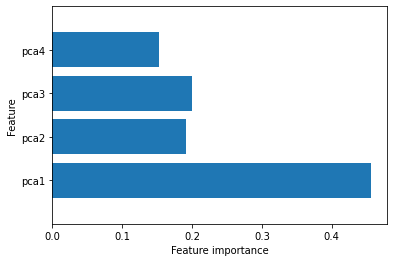

In [66]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest_pca)

#### Gradient Boosting

In [67]:
#start timer
startTime = perf_counter()
gbc_pca = GradientBoostingClassifier(verbose=False).fit(X_train2, y_train2)

print("-------------------------------")
print("Gradient Boosting Classifier(PCA): ")
print("-------------------------------")

gbc_trainScore2 = gbc_pca.score(X_train2, y_train2)
gbc_testScore2 = gbc_pca.score(X_test2, y_test2)
print("Train Score:", gbc_trainScore2)
print("Test Score:", gbc_testScore2)

#Using cross validation
cv_gbc_pca = cross_val_score(gbc_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_gbc_pca = cross_val_score(gbc_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_gbc_pca)

#confusion matrix
y_pred_gbc_test2 = cross_val_predict(gbc_pca, X_test2, y_test2, cv=50)
print(" ")
classificationSummary(y_test2, y_pred_gbc_test2)

print(" ")
ps_gbc_pca = precision_score(y_test2, y_pred_gbc_test2,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_gbc_pca[0])
print("precision Score(y = 1):",ps_gbc_pca[1])

print(" ")
rs_gbc_pca = recall_score(y_test2, y_pred_gbc_test2,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_gbc_pca[0])
print("recall Score(y = 1):",rs_gbc_pca[1])

regressionSummary(y_test2, y_pred_gbc_test2)
me_gbc_pca = round(np.mean(y_test2 - y_pred_gbc_test2), 4)
rmse_gbc_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_gbc_test2)), 4)
mae_gbc_pca = round(metrics.mean_absolute_error(y_test2, y_pred_gbc_test2), 4)

#end timer
endTime = perf_counter()
time12 = endTime-startTime
print("Total time:", time12)

-------------------------------
Gradient Boosting Classifier(PCA): 
-------------------------------
Train Score: 0.9332247557003257
Test Score: 0.8051948051948052
Test Score(Cross Validation): 0.7880779220779222
 
Confusion Matrix (Accuracy 0.7922)

       Prediction
Actual  0  1
     0 84 15
     1 17 38
 
Precision Score:
precision Score(y = 0): 0.8316831683168316
precision Score(y = 1): 0.7169811320754716
 
Recall Score:
recall Score(y = 0): 0.8484848484848485
recall Score(y = 1): 0.6909090909090909

Regression statistics

               Mean Error (ME) : 0.0130
Root Mean Squared Error (RMSE) : 0.4558
     Mean Absolute Error (MAE) : 0.2078
Total time: 87.1579825


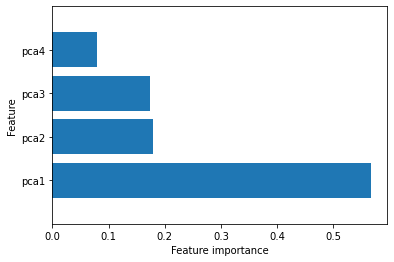

In [68]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbc_pca)

In [69]:
dataframe = {'Train Score': [table1.iloc[0,0], gnb_trainScore1, log_trainScore1, tree_trainScore1, forest_trainScore1, gbc_trainScore1,
                             table1_pca.iloc[0,0], gnb_trainScore2, log_trainScore2, tree_trainScore2, forest_trainScore2, gbc_trainScore2],
             'Test Score': [table1.iloc[0,1], gnb_testScore1, log_testScore1, tree_testScore1, forest_testScore1, gbc_testScore1,
                            table1_pca.iloc[0,1], gnb_testScore2, log_testScore2, tree_testScore2, forest_testScore2, gbc_testScore2],
             'Test Score(CV)': [cv_knn, cv_gnb, cv_log, cv_tree, cv_forest, cv_gbc,
                                cv_knn_pca, cv_gnb_pca, cv_log_pca, cv_tree_pca, cv_forest_pca, cv_gbc_pca],
             'Precision(0)': [ps_knn[0], ps_gnb[0], ps_log[0], ps_tree[0], ps_forest[0], ps_gbc[0],
                              ps_knn_pca[0], ps_gnb_pca[0], ps_log_pca[0], ps_tree_pca[0], ps_forest_pca[0], ps_gbc_pca[0]],
             'Precision(1)': [ps_knn[1], ps_gnb[1], ps_log[1], ps_tree[1], ps_forest[1], ps_gbc[1],
                              ps_knn_pca[1], ps_gnb_pca[1], ps_log_pca[1], ps_tree_pca[1], ps_forest_pca[1], ps_gbc_pca[1]],
             'Recall(0)': [rs_knn[0], rs_gnb[0], rs_log[0], rs_tree[0], rs_forest[0], rs_gbc[0],
                           rs_knn_pca[0], rs_gnb_pca[0], rs_log_pca[0], rs_tree_pca[0], rs_forest_pca[0], rs_gbc_pca[0]],
             'Recall(1)': [rs_knn[1], rs_gnb[1], rs_log[1], rs_tree[1], rs_forest[0], rs_gbc[1],
                           rs_knn_pca[1], rs_gnb_pca[1], rs_log_pca[1], rs_tree_pca[1], rs_forest_pca[0], rs_gbc_pca[1]],
             'ME': [me_knn, me_gnb, me_log, me_tree, me_forest, me_gbc,
                    me_knn_pca, me_gnb_pca, me_log_pca, me_tree_pca, me_forest_pca, me_gbc_pca],
             'RMSE': [rmse_knn, rmse_gnb, rmse_log, rmse_tree, rmse_forest, rmse_gbc,
                      rmse_knn_pca, rmse_gnb_pca, rmse_log_pca, rmse_tree_pca, rmse_forest_pca, rmse_gbc_pca],
             'MAE': [mae_knn, mae_gnb, mae_log, mae_tree, mae_forest, mae_gbc,
                     mae_knn_pca, mae_gnb_pca, mae_log_pca, mae_tree_pca, mae_forest_pca, mae_gbc_pca],
             'Time': [time1, time2, time3, time4, time5, time6, time7, time8, time9, time10, time11, time12]}

table = pd.DataFrame(dataframe, index = ["KNeighbors Classifier", "GaussianNB", "Logistic Regression", "Decision Tree Classifier", 
                                         "Random Forest Classifier", "Gradient Boosting Classifier","KNeighbors Classifier(PCA)", 
                                         "GaussianNB(PCA)", "Logistic Regression(PCA)", "Decision Tree Classifier(PCA)",
                                         "Random Forest Classifier(PCA)", "Gradient Boosting Classifier(PCA)"])
table = table.rename_axis(['Models'])
table = table.reset_index()
table.index += 1
display(table)
#table.sort_values("Test Score")

,Models,Train Score,Test Score,Test Score(CV),Precision(0),Precision(1),Recall(0),Recall(1),ME,RMSE,MAE,Time
1,KNeighbors Classifier,0.921824,0.863636,0.839675,0.903226,0.754098,0.848485,0.836364,-0.0390,0.3948,0.1558,11.289974
2,GaussianNB,0.767101,0.766234,0.764442,0.815534,0.705882,0.848485,0.654545,0.0260,0.4699,0.2208,4.014194
3,Logistic Regression,0.763844,0.779221,0.768532,0.847619,0.795918,0.898990,0.709091,0.0390,0.4109,0.1688,6.677235
4,Decision Tree Classifier,1.000000,0.837662,0.843649,0.800000,0.693878,0.848485,0.618182,0.0390,0.4835,0.2338,5.111646
5,Random Forest Classifier,1.000000,0.883117,0.879883,0.861386,0.773585,0.878788,0.878788,0.0130,0.4109,0.1688,133.940368
6,Gradient Boosting Classifier,0.993485,0.870130,0.880610,0.860000,0.759259,0.868687,0.745455,0.0065,0.4187,0.1753,96.705381
7,KNeighbors Classifier(PCA),0.814332,0.824675,0.781597,0.697842,0.866667,0.979798,0.236364,0.2597,0.5345,0.2857,11.161147
8,GaussianNB(PCA),0.760586,0.759740,0.758935,0.801887,0.708333,0.858586,0.618182,0.0455,0.4767,0.2273,4.007833
9,Logistic Regression(PCA),0.775244,0.766234,0.777195,0.839623,0.791667,0.898990,0.690909,0.0455,0.4187,0.1753,3.913381
10,Decision Tree Classifier(PCA),1.000000,0.759740,0.737273,0.815217,0.612903,0.757576,0.690909,-0.0455,0.5160,0.2662,4.867533


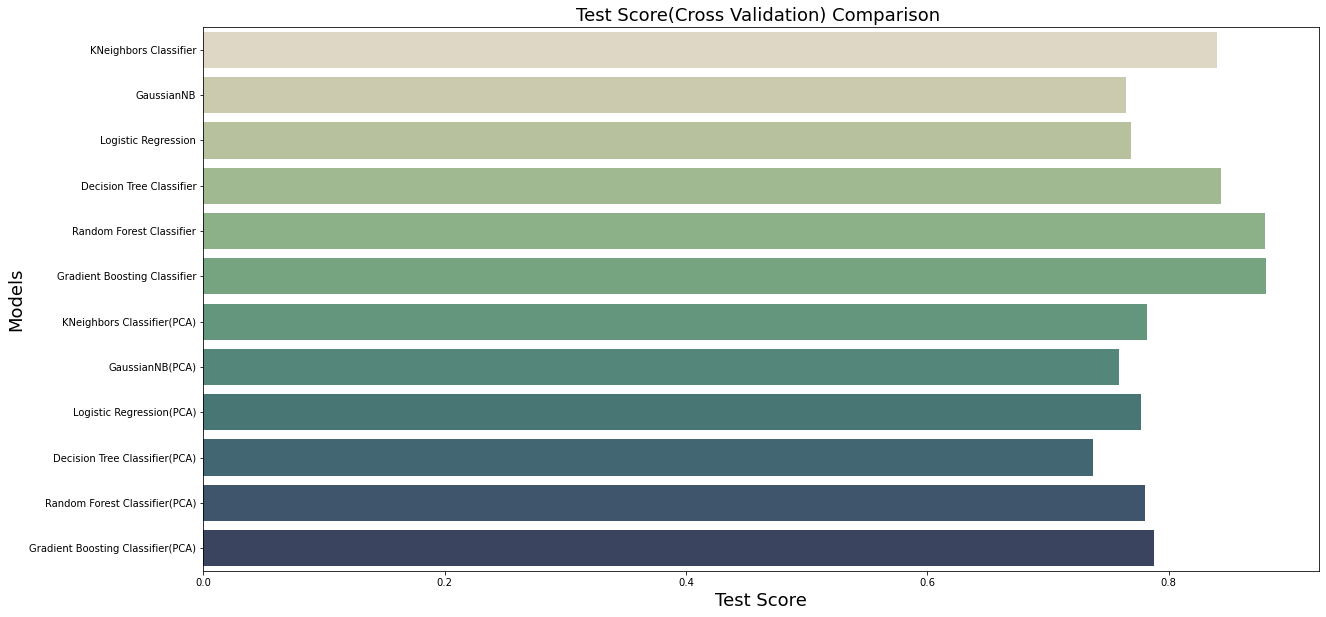

In [70]:
#make a plot
figure = plt.figure(figsize=(20,10))
sns.barplot(x = 'Test Score(CV)', y= 'Models', data=table, palette = sns.cubehelix_palette(len('Test Score(CV)'), start=.5, rot=-.85))
plt.xlabel("Test Score", fontsize = 18)
plt.ylabel("Models", fontsize = 18)
plt.title("Test Score(Cross Validation) Comparison ", fontsize = 18)
plt.show()

###  Unseen Data

In [71]:
diabetes1_0 = diabetes1[diabetes1["Outcome"]==0]
diabetes1_0 = diabetes1_0.reset_index(drop=True)
diabetes1_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_SkinThickness,New_Insulin,New_BMI_Range
0,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Normal,0,Normal,Overweight
1,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,0,Normal,Overweight
2,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30.0,0.0,Overweight,0,Normal,Overweight
3,10.0,115.0,70.0,27.0,102.5,35.3,0.134,29.0,0.0,Overweight,0,Normal,Morbid Obesity
4,4.0,110.0,92.0,27.0,102.5,37.6,0.191,30.0,0.0,Overweight,0,Normal,Morbid Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.0,89.0,62.0,27.0,102.5,22.5,0.142,33.0,0.0,Normal,0,Normal,Healty
496,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,Overweight,0,Abnormal,Obesity
497,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27.0,0.0,Overweight,0,Normal,Morbid Obesity
498,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,Overweight,0,Normal,Overweight


In [72]:
diabetes1_1 = diabetes1[diabetes1["Outcome"]==1]
diabetes1_1 = diabetes1_1.reset_index(drop=True)
diabetes1_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_SkinThickness,New_Insulin,New_BMI_Range
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,High,0,Abnormal,Obesity
1,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,High,0,Abnormal,Healty
2,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,High,0,Abnormal,Super Obesity
3,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,Normal,0,Normal,Obesity
4,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,High,0,Abnormal,Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1.0,High,0,Normal,Morbid Obesity
264,0.0,123.0,72.0,32.0,169.5,36.3,0.258,52.0,1.0,Overweight,0,Abnormal,Morbid Obesity
265,6.0,190.0,92.0,32.0,169.5,35.5,0.278,66.0,1.0,High,0,Abnormal,Morbid Obesity
266,9.0,170.0,74.0,31.0,169.5,44.0,0.403,43.0,1.0,High,0,Abnormal,Super Obesity


In [73]:
def is_integer(number):
    if isinstance(number, int):
        return True
    if isinstance(number, float):
        return number.is_integer()
    return False

In [74]:
def random_data(size, newdata, features,outcome):
    df_random = pd.DataFrame()
    for feat in features:
        m = newdata[feat].min()
        n = newdata[feat].max()
        
        if(is_integer(m)==True):
            randomlist = []
            for i in range(size):
                z = random.randint(m,n)
                randomlist.append(z)
            df_random[feat]=randomlist
        elif(is_integer(m)==False):
            randomlist = []
            for i in range(size):
                z = round(random.uniform(m, n),3)
                randomlist.append(z)
            df_random[feat]=randomlist
    outcomelist = []
    for i in range(size):
        outcomelist.append(outcome)
    df_random["Outcome"] = outcomelist
    return df_random

In [75]:
df_random_0 = random_data(500, diabetes1_0, features, 0)
df_random_1 = random_data(500, diabetes1_1, features, 1)

diabetes1_unseen = pd.concat([df_random_0, df_random_1], axis=0).reset_index(drop=True)
diabetes1_unseen = diabetes1_unseen.sample(frac=1).reset_index(drop=True)

In [76]:
X_unseen = diabetes1_unseen[features]
y_unseen = diabetes1_unseen["Outcome"]

In [77]:
X_unseen

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,8,179,43,49,208,54.634,0.751,71
1,8,177,113,41,516,26.528,0.432,44
2,7,193,107,53,179,31.943,2.088,23
3,4,143,79,42,86,47.509,1.284,50
4,12,122,114,8,316,64.591,0.721,42
...,...,...,...,...,...,...,...,...
995,2,174,47,28,668,29.229,0.537,39
996,11,111,70,73,549,57.552,1.213,69
997,3,189,116,14,627,28.101,1.138,59
998,5,172,64,23,440,56.373,1.799,45


In [78]:
y_unseen

0      0
1      1
2      0
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: Outcome, Length: 1000, dtype: int64

### Test Unseen Data Using Best Model（Gradient Boosting Classifier)

In [79]:
#start timer
startTime = perf_counter()
gbc_pca2 = GradientBoostingClassifier(verbose=False).fit(x, y)

print("-------------------------------")
print("Gradient Boosting Classifier(Best Model): ")
print("-------------------------------")

#gbc_trainScore3 = gbc_pca2.score(X_train1, y_train1)
gbc_testScore3 = gbc_pca2.score(X_unseen, y_unseen)
#print("Train Score:", gbc_trainScore3)
print("Test Score:", gbc_testScore3)

#Using cross validation
cv_gbc_pca2 = cross_val_score(gbc_pca2, X_unseen, y_unseen, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
#cv_gbc_pca2 = cross_val_score(gbc_pca2, X_test3, y_test3, cv=ShuffleSplit(n_splits=500, test_size=0.20), scoring = 'accuracy').mean()
print("Test Score(Cross Validation):", cv_gbc_pca2)

#confusion matrix
y_pred_gbc_test3 = cross_val_predict(gbc_pca2, X_unseen, y_unseen, cv=10)
print(" ")
classificationSummary(y_unseen, y_pred_gbc_test3)

print(" ")
ps_gbc_pca2 = precision_score(y_unseen, y_pred_gbc_test3,average=None)
print("Precision Score:")
print("precision Score(y = 0):",ps_gbc_pca2[0])
print("precision Score(y = 1):",ps_gbc_pca2[1])

print(" ")
rs_gbc_pca2 = recall_score(y_unseen, y_pred_gbc_test3,average=None)
print("Recall Score:")
print("recall Score(y = 0):",rs_gbc_pca2[0])
print("recall Score(y = 1):",rs_gbc_pca2[1])

#end timer
endTime = perf_counter()
time13 = endTime-startTime
print("Total time:", time13)


-------------------------------
Gradient Boosting Classifier(Best Model): 
-------------------------------
Test Score: 0.58
Test Score(Cross Validation): 0.82965
 
Confusion Matrix (Accuracy 0.8280)

       Prediction
Actual   0   1
     0 456  44
     1 128 372
 
Precision Score:
precision Score(y = 0): 0.7808219178082192
precision Score(y = 1): 0.8942307692307693
 
Recall Score:
recall Score(y = 0): 0.912
recall Score(y = 1): 0.744
Total time: 136.50390419999985


https://matplotlib.org/stable/tutorials/colors/colormaps.html 

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb